# Let's make some plots of our clusters: do the multiple-clusters events make problems for us?
## And let's do this to learn about pandas and uproot

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#import libraries and some constants

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy.stats as stats

# metadata
layers = ["EMB1", "EMB2", "EMB3", "TileBar0", "TileBar1", "TileBar2"]
cell_size_phi = [0.098, 0.0245, 0.0245, 0.1, 0.1, 0.1]
cell_size_eta = [0.0031, 0.025, 0.05, 0.1, 0.1, 0.2]
len_phi = [4, 16, 16, 4, 4, 4]
len_eta = [128, 16, 8, 4, 4, 2]

In [3]:
import atlas_mpl_style as ampl
ampl.use_atlas_style()
# plt.style.use('print')
plotpath = '/home/mswiatlowski/start_tf/caloml-atlas/clusters/Plots/'

In [4]:
# import our resolution utilities

import sys
sys.path.append('/home/mswiatlowski/start_tf/caloml-atlas/')
from  util import resolution_util as ru
from  util import plot_util as pu

import uproot as ur

Let's load the data: does this work?

In [5]:
path = '/fast_scratch/atlas_images/v7/'

pp_file = ur.open(path+'piplus.root')
pp_tree = pp_file['ClusterTree']
pp = pp_tree.pandas.df("*", flatten=False)

We should define some useful variables in the frame we'll be using again and again

In [6]:
pp['clusterEoverCalib'] = pp.clusterE / pp.cluster_ENG_CALIB_TOT

And now, reduce to just the events with 1 cluster, or the subleading clusters

In [7]:
pp_Single = pp[pp.nCluster==1]
pp_Multi = pp[(pp.nCluster>1) & (pp.clusterIndex!=0)]
pp_Leading = pp[pp.nCluster>1][pp.clusterIndex==0]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
pp_Small = pp[:10]

/home/mswiatlowski/start_tf/caloml-atlas/util/plot_util.py:32: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alpha = 0.5, label=labels[i], zorder=zorder_start + i)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


<Figure size 576x432 with 0 Axes>

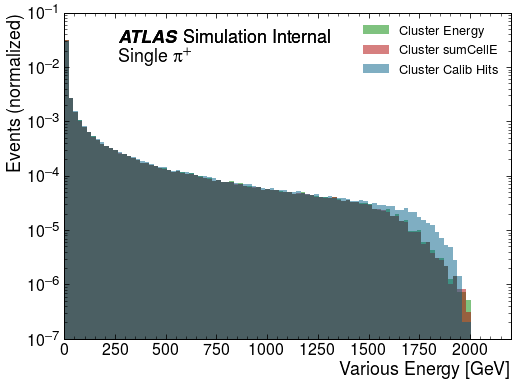

In [9]:
pu.histogramOverlay(frames = [pp, pp, pp],
                    data =  ['clusterE', 'cluster_sumCellE', 'cluster_ENG_CALIB_TOT'],
                    labels =['Cluster Energy', 'Cluster sumCellE', 'Cluster Calib Hits'],
                    xlabel = 'Various Energy [GeV]',
                    ylabel = 'Events (normalized)',
                    figfile = plotpath + '/hist_energy.pdf',
                    x_min = 0, x_max = 2200, xbins = 100, normed = True, y_log = True,
                    atlas_x = 0.12, atlas_y = 0.95, simulation = True,
                    textlist = [{'x': 0.12, 'y': 0.85, 'text': 'Single $\pi^{+}$'}])

/home/mswiatlowski/start_tf/caloml-atlas/util/plot_util.py:32: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alpha = 0.5, label=labels[i], zorder=zorder_start + i)


<Figure size 576x432 with 0 Axes>

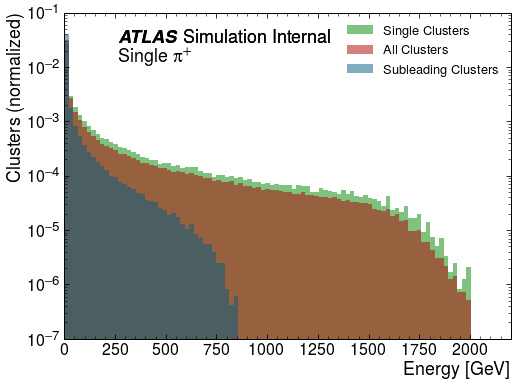

In [10]:
pu.histogramOverlay(frames = [pp_Single, pp, pp_Multi],
                    data =  ['clusterE', 'clusterE', 'clusterE'],
                    labels =['Single Clusters', 'All Clusters', 'Subleading Clusters'],
                    xlabel = 'Energy [GeV]',
                    ylabel = 'Clusters (normalized)',
                    figfile = plotpath + '/hist_energy_SingleMulti.pdf',
                    x_min = 0, x_max = 2200, xbins = 100, normed = True, y_log = True,
                    atlas_x = 0.12, atlas_y = 0.95, simulation = True,
                    textlist = [{'x': 0.12, 'y': 0.85, 'text': 'Single $\pi^{+}$'}])

<Figure size 576x432 with 0 Axes>

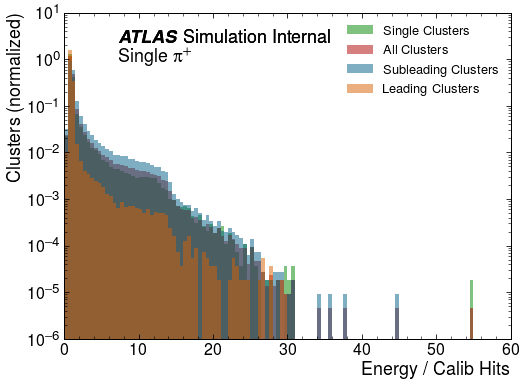

In [11]:
pu.histogramOverlay(frames = [pp_Single, pp, pp_Multi, pp_Leading],
                    data =  ['clusterEoverCalib', 'clusterEoverCalib', 'clusterEoverCalib', 'clusterEoverCalib'],
                    labels =['Single Clusters', 'All Clusters', 'Subleading Clusters', 'Leading Clusters'],
                    xlabel = 'Energy / Calib Hits',
                    ylabel = 'Clusters (normalized)',
                    figfile = plotpath + '/hist_response_SingleMulti.pdf',
                    x_min = 0, x_max = 60, xbins = 120, normed = True, y_log = True,
                    atlas_x = 0.12, atlas_y = 0.95, simulation = True,
                    textlist = [{'x': 0.12, 'y': 0.85, 'text': 'Single $\pi^{+}$'}])

<Figure size 576x432 with 0 Axes>

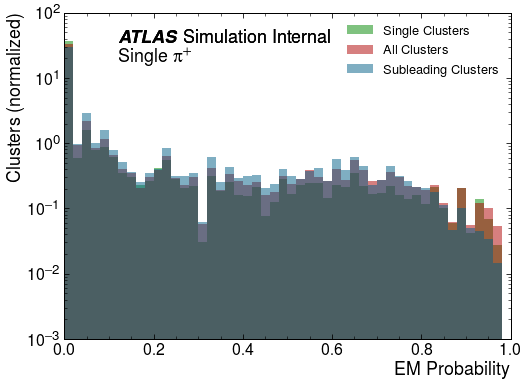

In [12]:
pu.histogramOverlay(frames = [pp_Single, pp, pp_Multi],
                    data =  ['cluster_EM_PROBABILITY', 'cluster_EM_PROBABILITY', 'cluster_EM_PROBABILITY'],
                    labels =['Single Clusters', 'All Clusters', 'Subleading Clusters'],
                    xlabel = 'EM Probability',
                    ylabel = 'Clusters (normalized)',
                    figfile = plotpath + '/hist_emResponse_SingleMulti.pdf',
                    x_min = 0, x_max = 1, xbins = 50, normed = True, y_log = True,
                    atlas_x = 0.12, atlas_y = 0.95, simulation = True,
                    textlist = [{'x': 0.12, 'y': 0.85, 'text': 'Single $\pi^{+}$'}])

All these are looking super consistent so far

<Figure size 576x432 with 0 Axes>

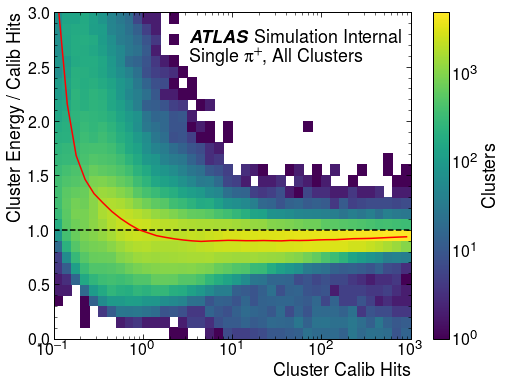

In [13]:
xcenter, medAll = ru.responsePlot(pp.cluster_ENG_CALIB_TOT, pp.clusterEoverCalib, 
                    figfile = plotpath+'hist_2D_calib_vs_ratio_pp_profile.pdf', statistic = 'median',
                    atlas_x = 0.38, atlas_y = 0.95, simulation = True,
                    textlist = [{'x': 0.38, 'y': 0.85, 'text': 'Single $\pi^{+}$, All Clusters'}])

<Figure size 576x432 with 0 Axes>

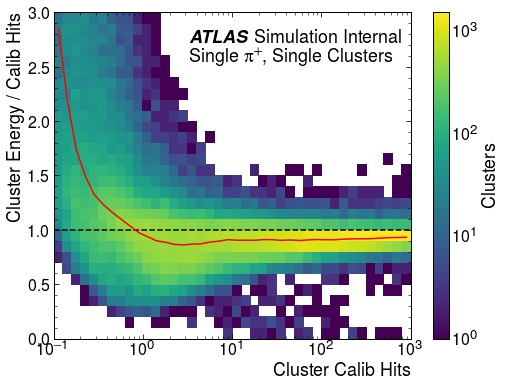

In [14]:
xcenter, medSingle = ru.responsePlot(pp_Single.cluster_ENG_CALIB_TOT, 
                      pp_Single.clusterEoverCalib, 
                      figfile = plotpath+'hist_2D_calib_vs_ratio_pp_profile_Single.pdf', statistic = 'median',
                      atlas_x = 0.38, atlas_y = 0.95, simulation = True,
                      textlist = [{'x': 0.38, 'y': 0.85, 'text': 'Single $\pi^{+}$, Single Clusters'}])

<Figure size 576x432 with 0 Axes>

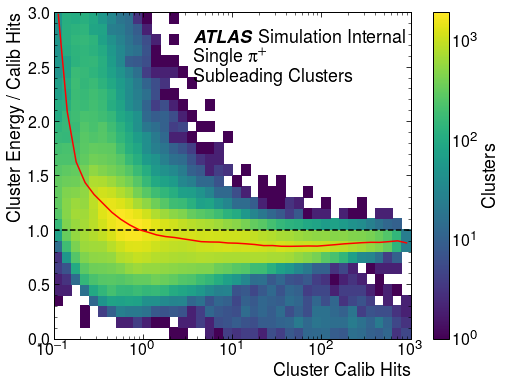

In [15]:
xcenter, medMulti = ru.responsePlot(pp_Multi.cluster_ENG_CALIB_TOT, 
                      pp_Multi.clusterEoverCalib, 
                      figfile = plotpath+'hist_2D_calib_vs_ratio_pp_profile_Multi.pdf', statistic = 'median',
                      atlas_x = 0.39, atlas_y = 0.95, simulation = True,
                      textlist = [{'x': 0.39, 'y': 0.85, 'text': 'Single $\pi^{+}$'},
                                  {'x': 0.39, 'y': 0.79, 'text': 'Subleading Clusters'}])

<Figure size 576x432 with 0 Axes>

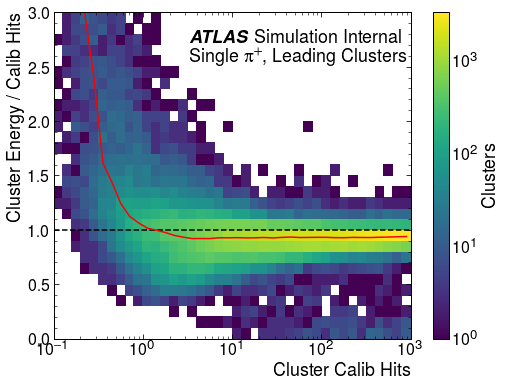

In [16]:
xcenter, medLeading = ru.responsePlot(pp_Leading.cluster_ENG_CALIB_TOT, 
                      pp_Leading.clusterEoverCalib, 
                      figfile = plotpath+'hist_2D_calib_vs_ratio_pp_profile_Leading.pdf', statistic = 'median',
                      atlas_x = 0.38, atlas_y = 0.95, simulation = True,
                      textlist = [{'x': 0.38, 'y': 0.85, 'text': 'Single $\pi^{+}$, Leading Clusters'}])

<Figure size 576x432 with 0 Axes>

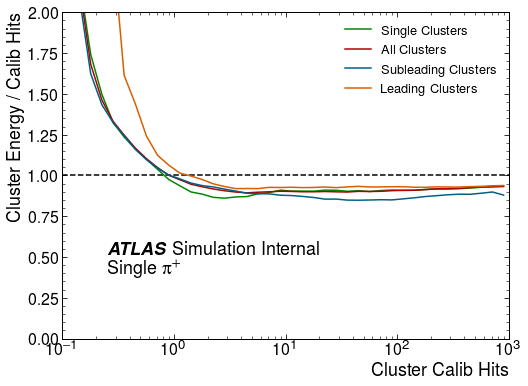

In [17]:
pu.lineOverlay(xcenter=xcenter, lines = [medSingle, medAll, medMulti, medLeading],
                labels=['Single Clusters', 'All Clusters', 'Subleading Clusters', 'Leading Clusters'],
                xlabel = 'Cluster Calib Hits', ylabel = 'Cluster Energy / Calib Hits',
                figfile = plotpath + 'hist_2D_calib_vs_ratio_pp_profile_Overlay.pdf',
                extra_lines=[[[0.1,1000],[1,1]]],
                atlas_x = 0.1, atlas_y = 0.3, simulation = True,
                textlist = [{'x': 0.1, 'y': 0.2, 'text': 'Single $\pi^{+}$'}])

In general the response also all looks ok as a function of the calib hits. Biggest difference is in the leading clusters at low truth energy.

<Figure size 576x432 with 0 Axes>

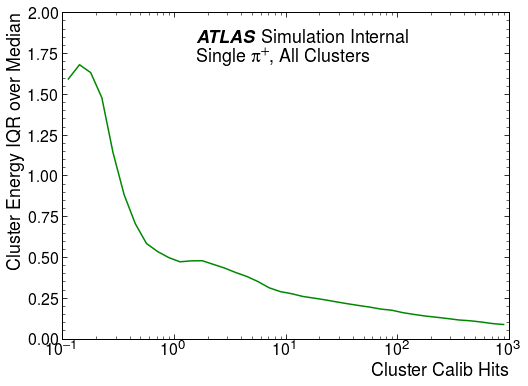

In [18]:
xcenter, iqrOverMedAll = ru.resolutionPlot(pp.cluster_ENG_CALIB_TOT, pp.clusterEoverCalib,
                            plotpath+'hist_2D_calib_vs_ratio_pp_iqrMed.pdf', 
                            statistic='iqrOverMed',
                            atlas_x = 0.3, atlas_y = 0.95, simulation = True,
                            textlist = [{'x': 0.3, 'y': 0.85, 'text': 'Single $\pi^{+}$, All Clusters'}])

<Figure size 576x432 with 0 Axes>

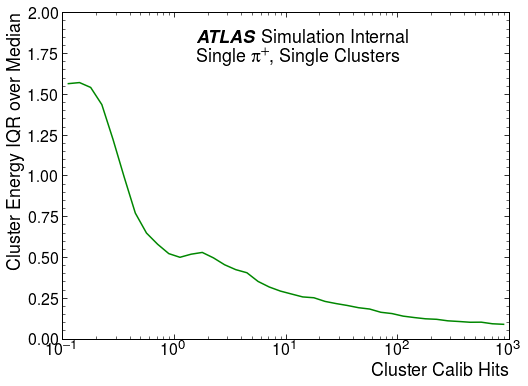

In [19]:
xcenter, iqrOverMedSingle = ru.resolutionPlot(pp_Single.cluster_ENG_CALIB_TOT, pp_Single.clusterEoverCalib,
                            plotpath+'hist_2D_calib_vs_ratio_pp_iqrMed_Single.pdf', 
                            statistic='iqrOverMed',
                            atlas_x = 0.3, atlas_y = 0.95, simulation = True,
                            textlist = [{'x': 0.3, 'y': 0.85, 'text': 'Single $\pi^{+}$, Single Clusters'}])

<Figure size 576x432 with 0 Axes>

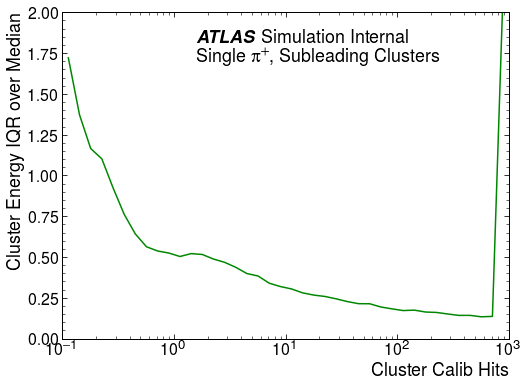

In [20]:
xcenter, iqrOverMedMulti = ru.resolutionPlot(pp_Multi.cluster_ENG_CALIB_TOT, 
                            pp_Multi.cluster_ENG_CALIB_TOT/pp_Multi.clusterE,
                            plotpath+'hist_2D_calib_vs_ratio_pp_iqrMed_Multi.pdf', 
                            statistic='iqrOverMed',
                            atlas_x = 0.3, atlas_y = 0.95, simulation = True,
                            textlist = [{'x': 0.3, 'y': 0.85, 'text': 'Single $\pi^{+}$, Subleading Clusters'}])

<Figure size 576x432 with 0 Axes>

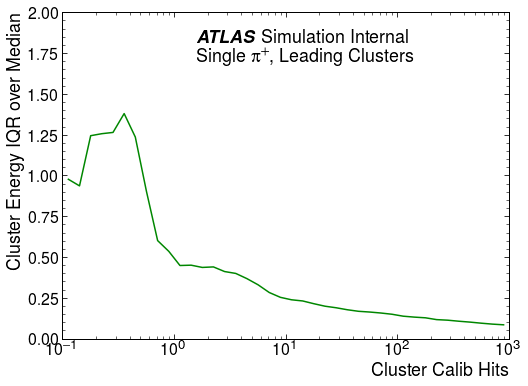

In [21]:
xcenter, iqrOverMedLeading = ru.resolutionPlot(pp_Leading.cluster_ENG_CALIB_TOT, 
                            pp_Leading.clusterEoverCalib,
                            plotpath+'hist_2D_calib_vs_ratio_pp_iqrMed_Leading.pdf', 
                            statistic='iqrOverMed',
                            atlas_x = 0.3, atlas_y = 0.95, simulation = True,
                            textlist = [{'x': 0.3, 'y': 0.85, 'text': 'Single $\pi^{+}$, Leading Clusters'}])

<Figure size 576x432 with 0 Axes>

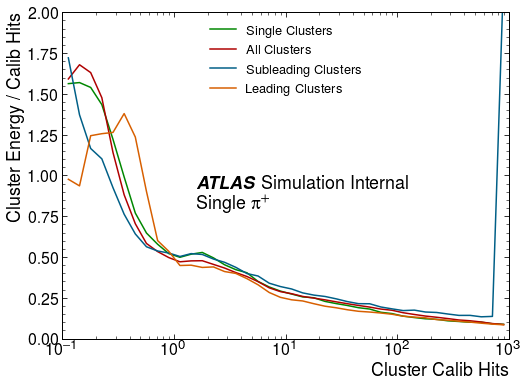

In [22]:
pu.lineOverlay(xcenter=xcenter, lines = [iqrOverMedSingle, iqrOverMedAll, iqrOverMedMulti, iqrOverMedLeading],
                labels=['Single Clusters', 'All Clusters', 'Subleading Clusters', 'Leading Clusters'],
                xlabel = 'Cluster Calib Hits', ylabel = 'Cluster Energy / Calib Hits',
                figfile = plotpath + 'hist_2D_calib_vs_ratio_pp_iqrMed_Overlay.pdf',
                x_min = 0.1, x_max = 1000, x_log = True,
                y_min = 0, y_max=2, y_log=False,
                atlas_x = 0.3, atlas_y = 0.5, simulation = True,
                textlist = [{'x': 0.3, 'y': 0.4, 'text': 'Single $\pi^{+}$'}])

Resolutions all look pretty compatible too: no big difference in one or the other, which is comforting! Some differences for leading clusters in events with multiple clusters.

## Should switch over to pi0 too to validate this

In [23]:
p0_file = ur.open(path+'pi0.root')
p0_tree = p0_file['ClusterTree']
p0 = p0_tree.pandas.df("*", flatten=False)

In [24]:
p0['clusterEoverCalib'] = p0.clusterE / p0.cluster_ENG_CALIB_TOT

In [25]:
p0_Single = p0[p0.nCluster==1]
p0_Multi  = p0[p0.nCluster>1][p0.clusterIndex!=0]
p0_Leading =  p0[p0.nCluster>1][p0.clusterIndex==0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


/home/mswiatlowski/start_tf/caloml-atlas/util/plot_util.py:32: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alpha = 0.5, label=labels[i], zorder=zorder_start + i)


<Figure size 576x432 with 0 Axes>

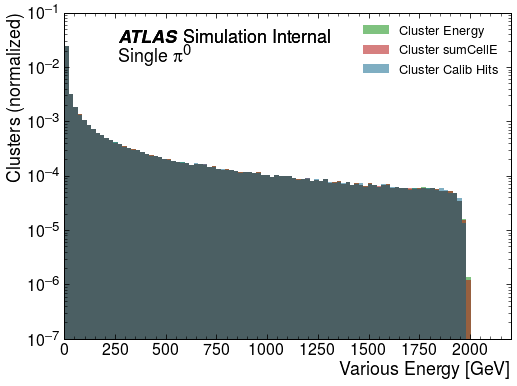

In [26]:
pu.histogramOverlay(frames = [p0, p0, p0],
                    data =  ['clusterE', 'cluster_sumCellE', 'cluster_ENG_CALIB_TOT'],
                    labels =['Cluster Energy', 'Cluster sumCellE', 'Cluster Calib Hits'],
                    xlabel = 'Various Energy [GeV]',
                    ylabel = 'Clusters (normalized)',
                    figfile = plotpath + '/hist_p0_energy.pdf',
                    x_min = 0, x_max = 2200, xbins = 100, normed = True, y_log = True,
                    atlas_x = 0.12, atlas_y = 0.95, simulation = True,
                    textlist = [{'x': 0.12, 'y': 0.85, 'text': 'Single $\pi^{0}$'}])

<Figure size 576x432 with 0 Axes>

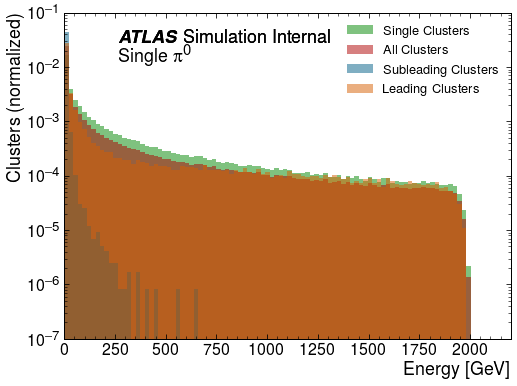

In [27]:
pu.histogramOverlay(frames = [p0_Single, p0, p0_Multi, p0_Leading],
                    data =  ['clusterE', 'clusterE', 'clusterE', 'clusterE'],
                    labels =['Single Clusters', 'All Clusters', 'Subleading Clusters', 'Leading Clusters'],
                    xlabel = 'Energy [GeV]',
                    ylabel = 'Clusters (normalized)',
                    figfile = plotpath + '/hist_p0_energy_SingleMulti.pdf',
                    x_min = 0, x_max = 2200, xbins = 100, normed = True, y_log = True,
                    atlas_x = 0.12, atlas_y = 0.95, simulation = True,
                    textlist = [{'x': 0.12, 'y': 0.85, 'text': 'Single $\pi^{0}$'}])

<Figure size 576x432 with 0 Axes>

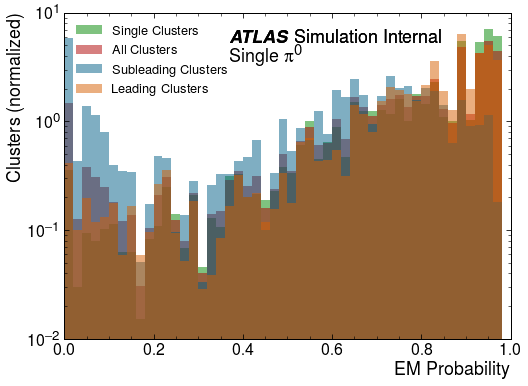

In [28]:
pu.histogramOverlay(frames = [p0_Single, p0, p0_Multi, p0_Leading],
                    data =  ['cluster_EM_PROBABILITY', 'cluster_EM_PROBABILITY', 'cluster_EM_PROBABILITY', 'cluster_EM_PROBABILITY'],
                    labels =['Single Clusters', 'All Clusters', 'Subleading Clusters', 'Leading Clusters'],
                    xlabel = 'EM Probability',
                    ylabel = 'Clusters (normalized)',
                    figfile = plotpath + '/hist_p0_emResponse_SingleMulti.pdf',
                    x_min = 0, x_max = 1, xbins = 50, normed = True, y_log = True,
                    atlas_x = 0.37, atlas_y = 0.95, simulation = True,
                    textlist = [{'x': 0.37, 'y': 0.85, 'text': 'Single $\pi^{0}$'}])

Subleading clusters look less EM like-- interesting

<Figure size 576x432 with 0 Axes>

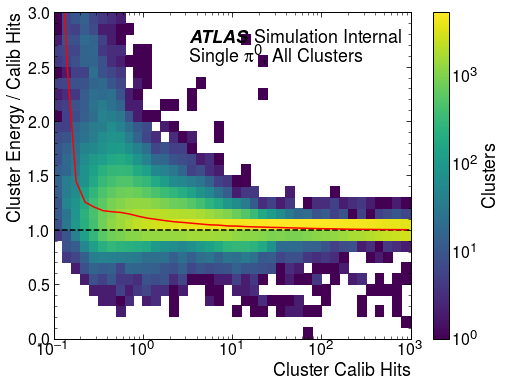

In [29]:
xcenter, medp0All = ru.responsePlot(p0.cluster_ENG_CALIB_TOT, p0.clusterEoverCalib, 
                    figfile = plotpath+'hist_2D_calib_vs_ratio_p0_profile.pdf', statistic = 'median',
                    atlas_x = 0.38, atlas_y = 0.95, simulation = True,
                    textlist = [{'x': 0.38, 'y': 0.85, 'text': 'Single $\pi^{0}$, All Clusters'}])

<Figure size 576x432 with 0 Axes>

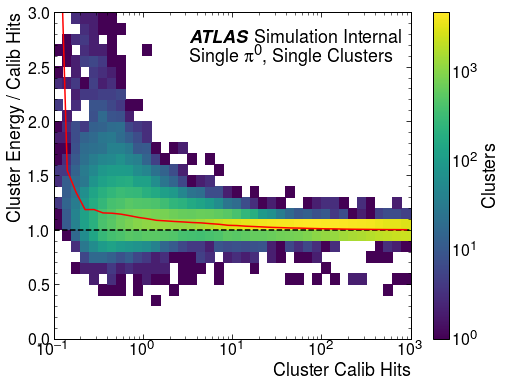

In [30]:
xcenter, medp0Single = ru.responsePlot(p0_Single.cluster_ENG_CALIB_TOT, p0_Single.clusterEoverCalib, 
                        figfile = plotpath+'hist_2D_calib_vs_ratio_p0_profile_Single.pdf', statistic = 'median',
                        atlas_x = 0.38, atlas_y = 0.95, simulation = True,
                        textlist = [{'x': 0.38, 'y': 0.85, 'text': 'Single $\pi^{0}$, Single Clusters'}])

<Figure size 576x432 with 0 Axes>

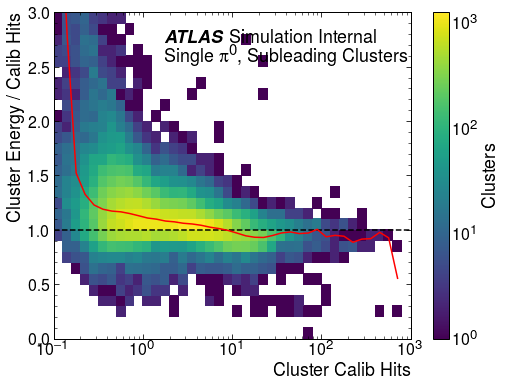

In [31]:
xcenter, medp0Multi = ru.responsePlot(p0_Multi.cluster_ENG_CALIB_TOT, p0_Multi.clusterEoverCalib, 
                        figfile = plotpath+'hist_2D_calib_vs_ratio_p0_profile_Multi.pdf', statistic = 'median',
                        atlas_x = 0.31, atlas_y = 0.95, simulation = True,
                        textlist = [{'x': 0.31, 'y': 0.85, 'text': 'Single $\pi^{0}$, Subleading Clusters'}])

<Figure size 576x432 with 0 Axes>

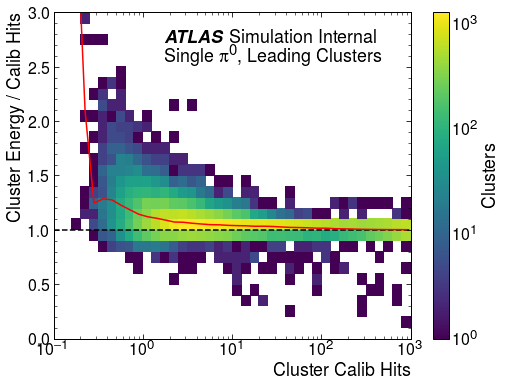

In [32]:
xcenter, medp0Leading = ru.responsePlot(p0_Leading.cluster_ENG_CALIB_TOT, p0_Leading.clusterEoverCalib, 
                        figfile = plotpath+'hist_2D_calib_vs_ratio_p0_profile_Leading.pdf', statistic = 'median',
                        atlas_x = 0.31, atlas_y = 0.95, simulation = True,
                        textlist = [{'x': 0.31, 'y': 0.85, 'text': 'Single $\pi^{0}$, Leading Clusters'}])

<Figure size 576x432 with 0 Axes>

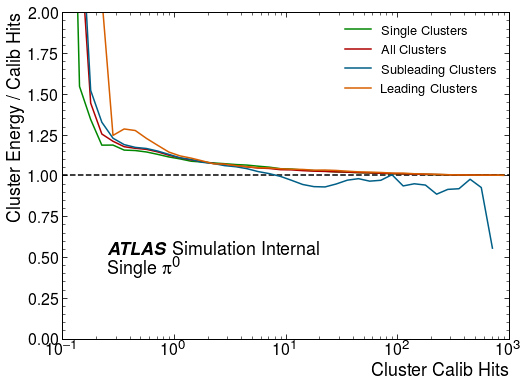

In [33]:
pu.lineOverlay(xcenter=xcenter, lines = [medp0Single, medp0All, medp0Multi, medp0Leading],
                labels=['Single Clusters', 'All Clusters', 'Subleading Clusters', 'Leading Clusters'],
                xlabel = 'Cluster Calib Hits', ylabel = 'Cluster Energy / Calib Hits',
                figfile = plotpath + 'hist_2D_calib_vs_ratio_p0_profile_Overlay.pdf',
                extra_lines=[[[0.1,1000],[1,1]]],
                atlas_x = 0.1, atlas_y = 0.3, simulation = True,
                textlist = [{'x': 0.1, 'y': 0.2, 'text': 'Single $\pi^{0}$'}])

<Figure size 576x432 with 0 Axes>

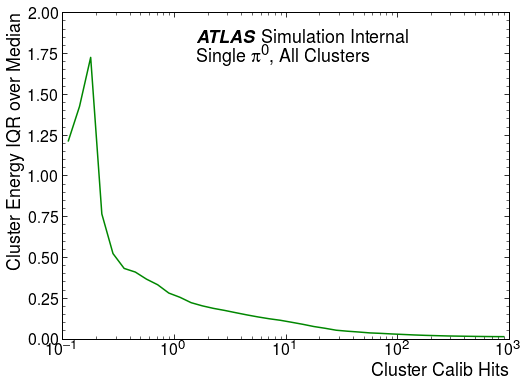

In [34]:
xcenter, iqrOverMedp0All = ru.resolutionPlot(p0.cluster_ENG_CALIB_TOT, p0.clusterEoverCalib,
                            plotpath+'hist_2D_calib_vs_ratio_p0_iqrMed.pdf', 
                            statistic='iqrOverMed',
                            atlas_x = 0.3, atlas_y = 0.95, simulation = True,
                            textlist = [{'x': 0.3, 'y': 0.85, 'text': 'Single $\pi^{0}$, All Clusters'}])

<Figure size 576x432 with 0 Axes>

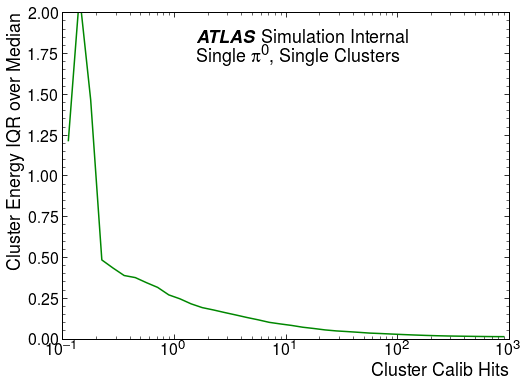

In [35]:
xcenter, iqrOverMedp0Single = ru.resolutionPlot(p0_Single.cluster_ENG_CALIB_TOT, p0_Single.clusterEoverCalib,
                            plotpath+'hist_2D_calib_vs_ratio_p0_iqrMed_Single.pdf', 
                            statistic='iqrOverMed',
                            atlas_x = 0.3, atlas_y = 0.95, simulation = True,
                            textlist = [{'x': 0.3, 'y': 0.85, 'text': 'Single $\pi^{0}$, Single Clusters'}])

<Figure size 576x432 with 0 Axes>

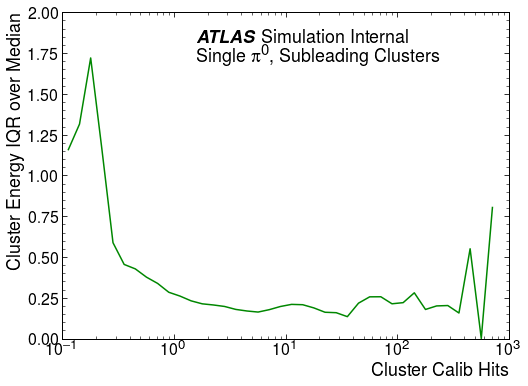

In [36]:
xcenter, iqrOverMedp0Multi = ru.resolutionPlot(p0_Multi.cluster_ENG_CALIB_TOT, p0_Multi.clusterEoverCalib,
                            plotpath+'hist_2D_calib_vs_ratio_p0_iqrMed_Multi.pdf', 
                            statistic='iqrOverMed',
                            atlas_x = 0.3, atlas_y = 0.95, simulation = True,
                            textlist = [{'x': 0.3, 'y': 0.85, 'text': 'Single $\pi^{0}$, Subleading Clusters'}])

<Figure size 576x432 with 0 Axes>

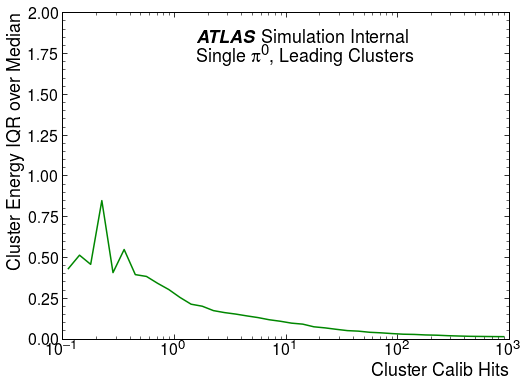

In [37]:
xcenter, iqrOverMedp0Leading = ru.resolutionPlot(p0_Leading.cluster_ENG_CALIB_TOT,  
                            p0_Leading.clusterEoverCalib,
                            plotpath+'hist_2D_calib_vs_ratio_p0_iqrMed_Leading.pdf', 
                            statistic='iqrOverMed',
                            atlas_x = 0.3, atlas_y = 0.95, simulation = True,
                            textlist = [{'x': 0.3, 'y': 0.85, 'text': 'Single $\pi^{0}$, Leading Clusters'}])

<Figure size 576x432 with 0 Axes>

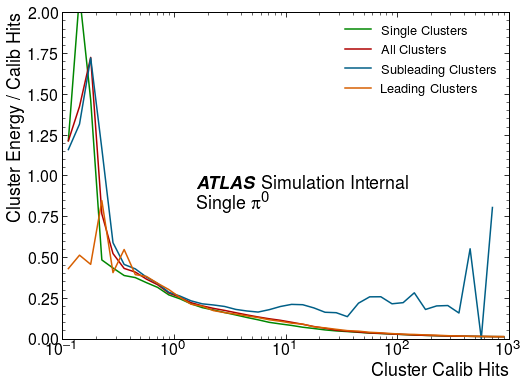

In [38]:
pu.lineOverlay(xcenter=xcenter, lines = [iqrOverMedp0Single, iqrOverMedp0All, iqrOverMedp0Multi, iqrOverMedp0Leading],
                labels=['Single Clusters', 'All Clusters', 'Subleading Clusters', 'Leading Clusters'],
                xlabel = 'Cluster Calib Hits', ylabel = 'Cluster Energy / Calib Hits',
                figfile = plotpath + 'hist_2D_calib_vs_ratio_p0_iqrMed_Overlay.pdf',
                x_min = 0.1, x_max = 1000, x_log = True,
                y_min = 0, y_max=2, y_log=False,
                atlas_x = 0.3, atlas_y = 0.5, simulation = True,
                textlist = [{'x': 0.3, 'y': 0.4, 'text': 'Single $\pi^{0}$'}])

Some differences, but ok-- fairly consistent in general

Finally, what are the plain old numbers going around here?

In [39]:
print('Number of all pi+ clusters: {}'. format(len(pp)))
print('Number of single pi+ clusters: {}'. format(len(pp_Single)))
print('Number of subleading pi+ clusters: {}'. format(len(pp_Multi)))
print('Number of leading pi+ clusters: {}'. format(len(pp_Leading)))

print('Number of all pi0 clusters: {}'. format(len(p0)))
print('Number of single pi0 clusters: {}'. format(len(p0_Single)))
print('Number of subleading pi0 clusters: {}'. format(len(p0_Multi)))
print('Number of leading pi0 clusters: {}'. format(len(p0_Leading)))

Number of all pi+ clusters: 435967
Number of single pi+ clusters: 108263
Number of subleading pi+ clusters: 217707
Number of leading pi+ clusters: 109997
Number of all pi0 clusters: 263891
Number of single pi0 clusters: 163985
Number of subleading pi0 clusters: 53914
Number of leading pi0 clusters: 45992


This seems all consistent. The numbers don't add up because there's a 'leading cluster in the events with multiple clusters' category that I haven't studied. Should I add those to the plots? Wouldn't be so hard at this point. Ok, done!